In [1]:
import modules.camera_calibrator as cc
import modules.perspective_transformer as pt
import modules.thresholding as th
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import modules.util as util
import numpy as np
import cv2
import glob
import os
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
#%% Initialize camera calibrator
filenames = glob.glob('./camera_cal/calibration*.jpg')
calibrator = cc.Camera_Calibrator(filenames, 6, 9)

INFO:root:[Camera_Calibrator] Initializing...
INFO:root:[Camera_Calibrator] Done!


In [3]:
test_image_file_names = os.listdir("./output_images/thresholding_images/")
images = []
for test_image_file_name in test_image_file_names:
    test_image = mpimg.imread(os.path.join('./output_images/thresholding_images/', test_image_file_name))
    undistorted = calibrator.undistort(test_image)
    images.append(undistorted)

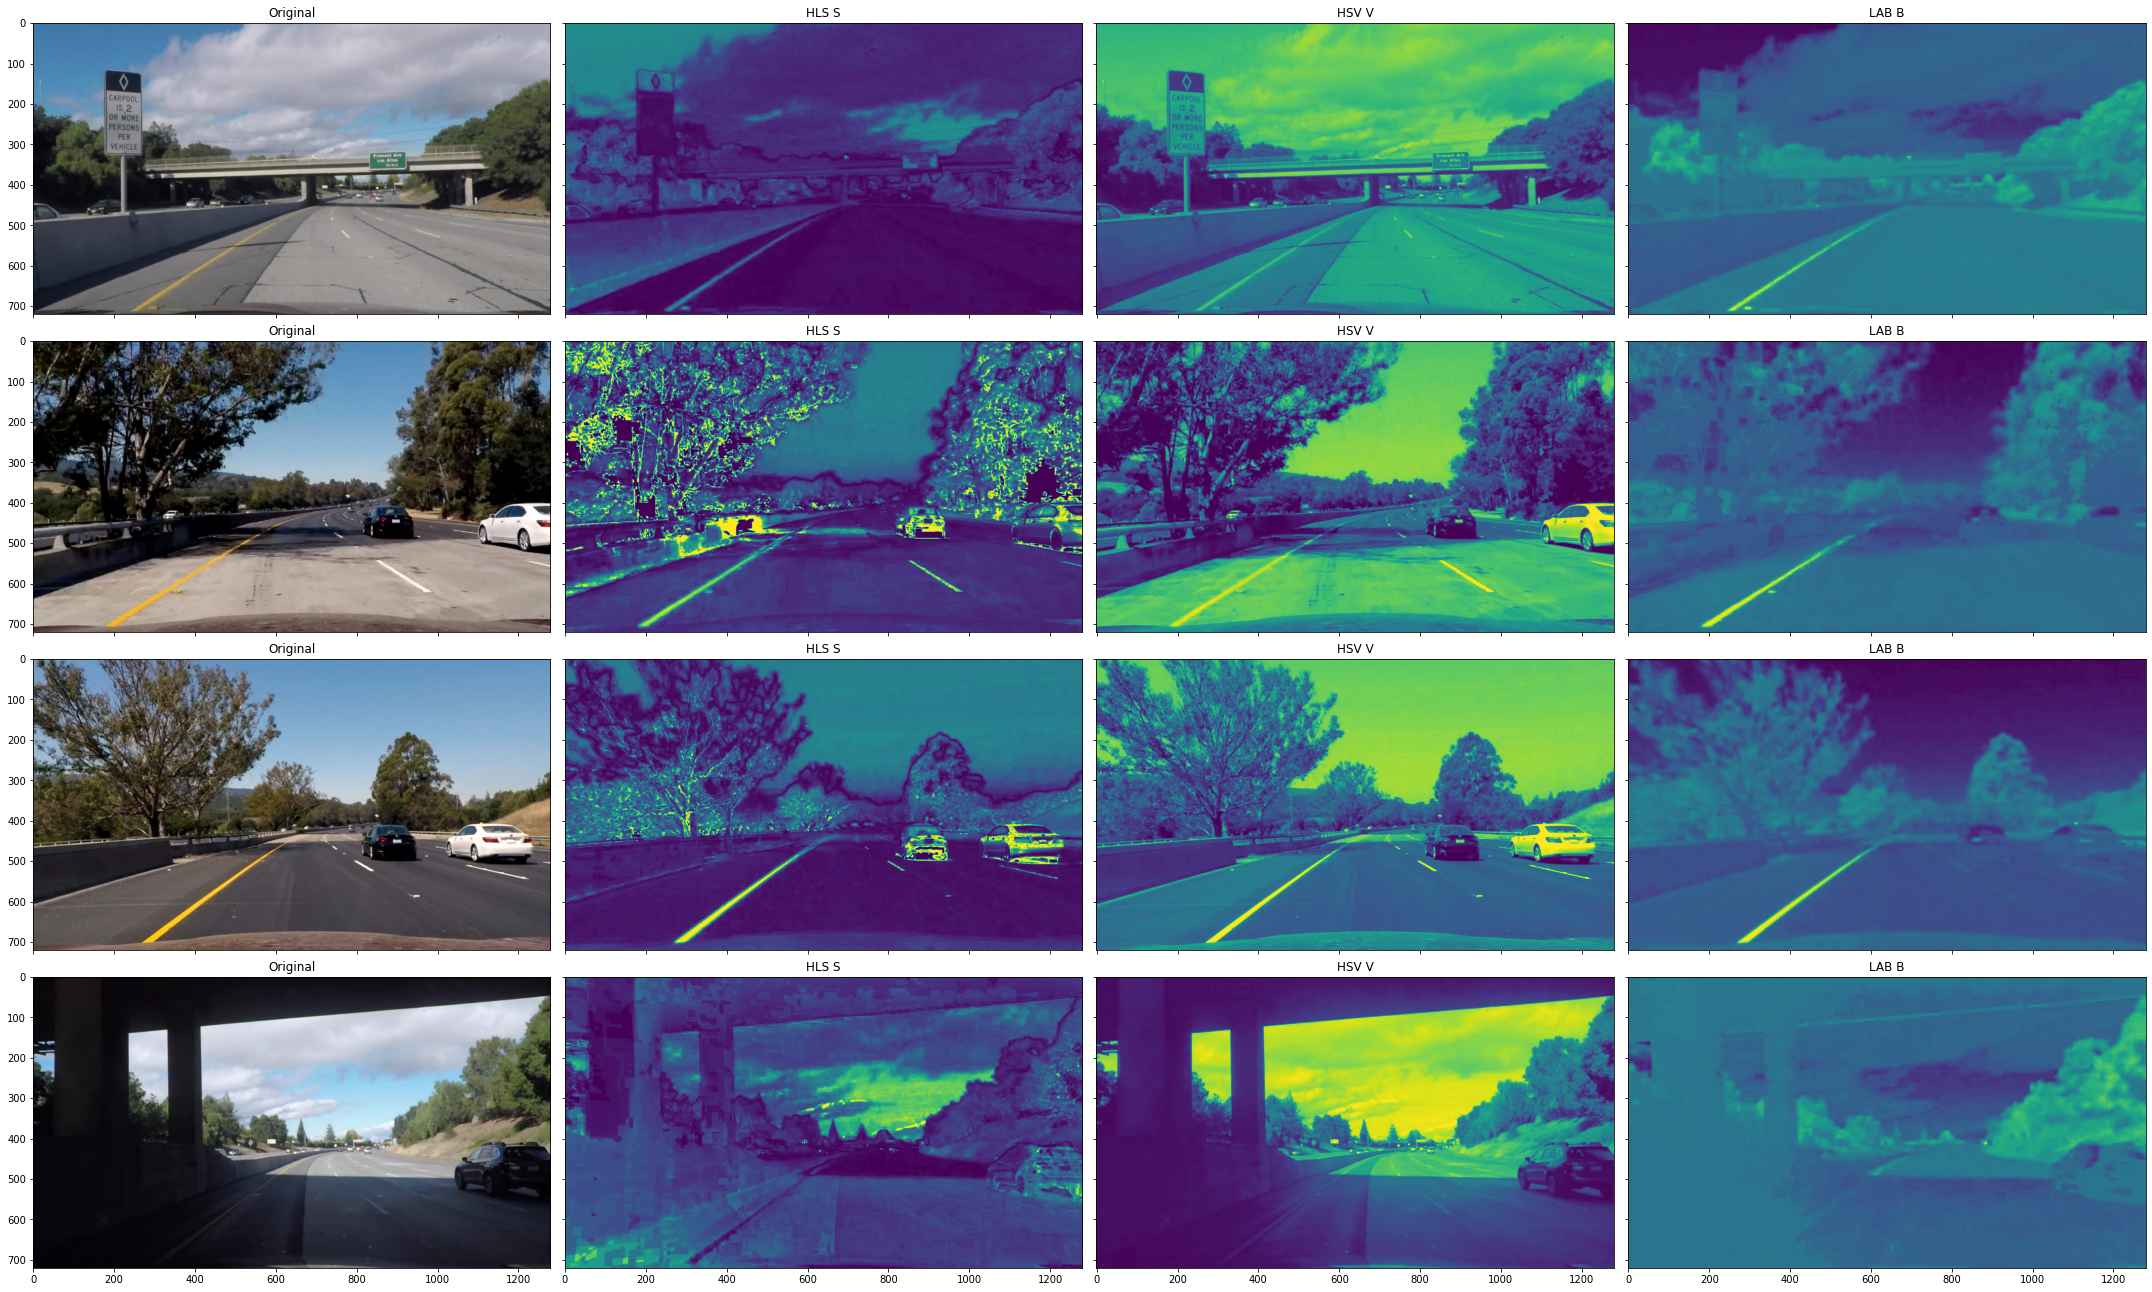

In [4]:


fig,axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(30, 18))
counter = 0
for image in images:
    hls_s = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    hsv_v = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,2]
    lab_b = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)[:,:,2]
    axs[counter, 0].imshow(image)
    axs[counter, 0].set_title('Original')
    axs[counter, 1].imshow(hls_s)
    axs[counter, 1].set_title('HLS S')
    axs[counter, 2].imshow(hsv_v)
    axs[counter, 2].set_title('HSV V')
    axs[counter, 3].imshow(lab_b)
    axs[counter, 3].set_title('LAB B')
    counter += 1
plt.tight_layout()
plt.show()
plt.savefig("./output_images/thresholding_outputs/color_spaces.jpg")

In [5]:
def hls_s_interactive_mask(ksize=21, val_low=0, val_high=25, mag_low=7, mag_high=169, dir_low=0, dir_high=1.1):
    fig,axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(10, 10))
    counter = 0
    for image in images:
        hls_s = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
        binary = th.thresh(hls_s, ksize, val_low, val_high, mag_low, mag_high, dir_low, dir_high)
        output = np.dstack((binary, binary, binary))   
        axs[counter, 1].imshow(hls_s)
        axs[counter, 0].imshow(output)
        counter += 1

interact(hls_s_interactive_mask, ksize=(1,31,2), val_low=(0,255), val_high=(0,255),\
         mag_low=(0,255), mag_high=(0,255), dir_low=(0, np.pi/2), dir_high=(0, np.pi/2))

interactive(children=(IntSlider(value=21, description='ksize', max=31, min=1, step=2), IntSlider(value=0, desc…

<function __main__.hls_s_interactive_mask(ksize=21, val_low=0, val_high=25, mag_low=7, mag_high=169, dir_low=0, dir_high=1.1)>

In [7]:
def hsv_v_interactive_mask(ksize=3, val_low=180, val_high=255, mag_low=20, mag_high=150, dir_low=0, dir_high=1.2):
    fig,axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(10, 15))
    counter = 0
    for image in images:
        hsv_v = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,2]
        binary = th.thresh(hsv_v, ksize, val_low, val_high, mag_low, mag_high, dir_low, dir_high)
        output = np.dstack((binary, binary, binary))   
        axs[counter, 1].imshow(hsv_v)
        axs[counter, 0].imshow(output)
        counter += 1

interact(hsv_v_interactive_mask, ksize=(1,31,2), val_low=(0,255), val_high=(0,255),\
         mag_low=(0,255), mag_high=(0,255), dir_low=(0, np.pi/2), dir_high=(0, np.pi/2))

interactive(children=(IntSlider(value=3, description='ksize', max=31, min=1, step=2), IntSlider(value=180, des…

<function __main__.hsv_v_interactive_mask(ksize=3, val_low=180, val_high=255, mag_low=20, mag_high=150, dir_low=0, dir_high=1.2)>

In [8]:
def lab_b_interactive_mask(ksize=7, val_low=156, val_high=255, mag_low=0, mag_high=255, dir_low=0, dir_high=1.2):
    fig,axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(10, 15))
    counter = 0
    for image in images:
        lab_b = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)[:,:,2]
        binary = th.thresh(lab_b, ksize, val_low, val_high, mag_low, mag_high, dir_low, dir_high)
        output = np.dstack((binary, binary, binary))   
        axs[counter, 1].imshow(lab_b)
        axs[counter, 0].imshow(output)
        counter += 1

interact(lab_b_interactive_mask, ksize=(1,31,2), val_low=(0,255), val_high=(0,255),\
         mag_low=(0,255), mag_high=(0,255), dir_low=(0, np.pi/2), dir_high=(0, np.pi/2))

interactive(children=(IntSlider(value=7, description='ksize', max=31, min=1, step=2), IntSlider(value=156, des…

<function __main__.lab_b_interactive_mask(ksize=7, val_low=156, val_high=255, mag_low=0, mag_high=255, dir_low=0, dir_high=1.2)>